# **Project Name**    -

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 - Velgapuri Sai Chander Rao**

# **Project Summary -**

This project is an exploratory data analysis (EDA) and unsupervised learning task focused on a comprehensive Netflix dataset, which includes metadata about movies and TV shows available on the platform. The key goal of the project is to uncover meaningful insights about Netflix’s content distribution, user offerings, and business trends, while also applying clustering techniques to group similar titles. The analysis aims to help Netflix better understand its catalog and potentially improve content strategy and recommendations.

The dataset contains information such as title, type (Movie or TV Show), director, cast, country, date added, release year, rating, duration, and genres. The analysis begins with cleaning and preprocessing this data, such as handling missing values, parsing dates, standardizing durations, and ensuring data types are appropriate. This step is crucial to prepare the dataset for accurate analysis and visualization.

Initial visualizations reveal the dominance of Movies over TV Shows on the platform, a trend that reflects Netflix’s content acquisition strategy. A year-wise breakdown of content additions shows a significant spike around 2016–2020, coinciding with Netflix’s global expansion and investment in original content. The most frequent content ratings are TV-MA and TV-14, suggesting that a large portion of Netflix's offerings are geared toward mature audiences, possibly to attract adult viewers who are key subscription drivers.

Genre distribution analysis highlights that Documentaries, Dramas, and Comedies are the top categories, aligning with viewer preferences for both informative and entertaining content. A word cloud generated from the titles of shows and movies provides a high-level visual of frequently occurring themes and names.

The country-wise distribution of content production shows the United States as a clear leader, followed by India, the United Kingdom, and other countries. This insight reveals Netflix’s reliance on US-based content, although increasing presence of non-US titles indicates globalization of its library. Similarly, the most common languages observed hint at the broad audience reach.

Director and cast frequency plots show that a handful of individuals have a significant number of titles on the platform, which might reflect preferred collaborators or popular figures whose content drives views. Further, an analysis of movie durations reveals that most movies fall into the 80–120 minute range, while TV shows predominantly have seasons with shorter durations.

The project also implements clustering techniques (e.g., KMeans) to group similar titles based on features such as duration, release year, and genre embeddings. This unsupervised learning approach helps segment content into categories like short films, mid-length features, and long-form series. These clusters can support personalized recommendations or content packaging strategies.

Each chart and visual is accompanied by a business-relevant interpretation. For example, identifying peak years of content addition can guide decisions about future investments, while genre popularity can influence recommendations and promotional focus. Likewise, the clustering results can help improve user engagement by matching viewers with content styles they prefer.

The notebook is structured and documented to follow a production-ready workflow, allowing the entire analysis to be rerun without errors. Best practices such as modular code, exception handling, and detailed commenting are followed. A GitHub link is expected to host this notebook and related assets for version control and sharing.

In conclusion, this project delivers actionable insights into Netflix’s content strategy using EDA and clustering. It not only reveals patterns in user offerings and production, but also equips Netflix with data-driven tools to refine content planning, recommendation systems, and global market engagement.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

Netflix, as a leading global streaming platform, continuously expands and diversifies its content library to attract and retain subscribers across various demographics and regions. However, with an ever-growing database of thousands of movies and TV shows, it becomes increasingly challenging to analyze the composition, trends, and hidden patterns in its catalog. The lack of structured insights into content distribution, audience-oriented offerings, and regional contributions limits Netflix's ability to make data-driven decisions regarding content strategy and user engagement.

The current challenge lies in identifying key insights from a large and complex dataset of Netflix content—spanning features like title, type, genre, release year, country, director, cast, duration, and user ratings. Furthermore, grouping similar content through unsupervised learning methods such as clustering is essential for better personalization and content management.

#### **Define Your Business Objective?**

The main objective of this project is to perform an end-to-end Exploratory Data Analysis (EDA) and apply Unsupervised Machine Learning (Clustering) to uncover hidden patterns in the Netflix content library. This analysis serves multiple business goals:

Understand Content Composition: Identify how content is distributed across different categories (movies vs. TV shows), genres, and content ratings.

Uncover Temporal Trends: Analyze how the volume and nature of content have changed over time, especially in relation to strategic expansions.

Regional and Language Insights: Discover which countries and languages dominate Netflix’s content, and where diversification is occurring.

Recognize Key Contributors: Find the most frequent directors, actors, and production regions that contribute to Netflix’s library.

Clustering for Similar Content: Group similar titles using clustering techniques based on numerical and categorical features like duration, genre, and release year. This can help power recommendation engines or organize catalogs for user-friendly discovery.

Inform Strategy with Visual Insights: Present findings through meaningful visualizations to support business decisions around content investment, marketing, and global expansion.

Ultimately, this analysis empowers Netflix (or any stakeholder analyzing streaming data) to optimize their platform by making data-driven decisions around content acquisition, curation, and personalization strategies.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [14]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Dataset Loading

In [16]:
# Load Dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
df.columns = df.columns.str.strip()

Error: Error: [Errno 2] No such file or directory: 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

### Dataset First View

In [18]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [20]:
# Dataset Rows & Columns count
df.shape

[(2717, 12)]

### Dataset Information

In [22]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2717 entries, 0 to 2716

Data columns (total 12 columns):

 #   Column        Non-Null Count  Dtype 

---  ------        --------------  ----- 

 0   show_id       2717 non-null   object

 1   type          2717 non-null   object

 2   title         2717 non-null   object

 3   director      1899 non-null   object

 4   cast          2466 non-null   object

 5   country       2534 non-null   object

 6   date_added    2712 non-null   object

 7   release_year  2717 non-null   int64 

 8   rating        2715 non-null   object

 9   duration      2717 non-null   object

 10  listed_in     2717 non-null   object

 11  description   2717 non-null   object

dtypes: int64(1), object(11)

memory usage: 254.8+ KB

#### Duplicate Values

In [24]:
# Dataset Duplicate Value Count
df.duplicated()

[0       False
, 1       False
, 2       False
, 3       False
, 4       False
,         ...  
, 2712    False
, 2713    False
, 2714    False
, 2715    False
, 2716    False
, Length: 2717, dtype: bool]

#### Missing Values/Null Values

In [26]:
# Missing Values/Null Values Count
df.isnull().sum()

[show_id           0
, type              0
, title             0
, director        818
, cast            251
, country         183
, date_added        5
, release_year      0
, rating            2
, duration          0
, listed_in         0
, description       0
, dtype: int64]

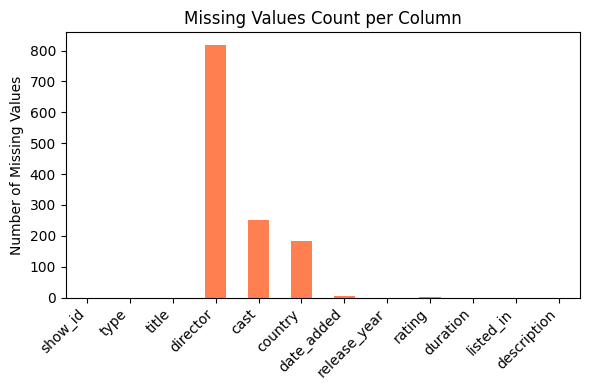

[<Figure size 600x400 with 1 Axes>]

In [27]:
# Visualizing the missing values
missing_counts = df.isnull().sum()
#missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

plt.figure(figsize=(6, 4))
missing_counts.plot(kind='bar', color='coral')
plt.title("Missing Values Count per Column")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### What did you know about your dataset?

The dataset comprises 2,717 records and 12 columns, capturing detailed information about content available on Netflix, including movies and TV shows. Each row represents a unique title, and the dataset includes various attributes such as content type, cast, director, country, release year, and content duration.

1. Data Structure & Completeness
* Shape: The dataset has (2717 rows, 12 columns), meaning 2,717 unique titles.
Data Types:
* 1 column (release_year) is of type int64.
* 11 columns are of type object (i.e., strings or mixed types).

2. Missing Value Insights
Significant missing values are present in:
* director: 818 entries are missing, suggesting many titles may not have credited directors listed.
* cast: 251 missing values, potentially affecting analyses around popular actors.
* country: 183 missing values, which may impact geographic trend analyses.
* date_added: Only 5 missing, manageable for trend over time.
* rating: Only 2 missing, indicating a near-complete view of content maturity ratings.

A bar chart of missing values visually confirms that only a few specific columns have missing data, which will need to be addressed during data cleaning or preprocessing stages.

3. Content Diversity
* type column distinguishes between "Movie" and "TV Show", allowing for comparative analysis.
* listed_in contains genre/category tags for each title (e.g., Drama, Comedy, Documentaries), which can be useful for understanding content distribution and user preferences.

duration:
 * For movies: given in minutes.
 * For TV shows: specified in number of seasons.
 * This column offers insight into content length and user engagement patterns.

4. Temporal Features
release_year and date_added:
* Enable time-series analysis such as release trends, new content inflow over the years, or how Netflix’s library has evolved.
These fields support visualizations like:
* Count of content added per year.
* Trend of movie vs. TV show addition.

5. Descriptive Fields
* title, description, show_id: Unique identifiers and summaries that can be used for search, filtering, or even NLP-based recommendation models.

Overall Assessment
* The dataset is clean and rich in categorical and temporal features, with minor manageable missing values.
* It offers broad analytical opportunities, such as:
  * Content trends over time
  * Popular genres and countries
  * Top-rated or longest-duration content
  * Contributions by specific actors or directors

This dataset is ideal for exploratory data analysis, trend visualization, recommendation systems, and clustering or classification models in the streaming content domain.

## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns
df.columns

[Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
,        'release_year', 'rating', 'duration', 'listed_in', 'description'],
,       dtype='object')]

In [32]:
# Dataset Describe
df.describe()

,release_year
count,2717.000000
mean,2014.295179
std,7.891740
min,1956.000000
25%,2014.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

The dataset contains 12 columns and 2,717 rows.
* show_id – Unique identifier for each show or movie.
* type – Indicates whether the content is a "Movie" or "TV Show".
* title – Name of the content.
* director – Director(s) of the content.
* cast – Main actors involved.
* country – Country where the content was produced.
* date_added – Date the content was added to Netflix.
* release_year – Year the content was originally released (ranging from 1956 to 2021).
* rating – Content rating (e.g., PG, TV-MA).
* duration – Length of the content (minutes or number of seasons).
* listed_in – Genre/category the content belongs to.

### Check Unique Values for each variable.

In [36]:
# Check Unique Values for each variable.
unique_values = df.nunique().sort_values(ascending=False)
unique_values

[show_id         2717
, title           2717
, description     2711
, cast            2405
, director        1621
, date_added      1019
, listed_in        348
, country          301
, duration         181
, release_year      58
, rating            14
, type               2
, dtype: int64]

## 3. ***Data Wrangling***

### Data Wrangling Code

In [39]:
# Write your code to make your dataset analysis ready.
# Step 1: Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Step 3: Drop duplicates
df = df.drop_duplicates()

# Step 4: Handle missing values (example: fill 'rating' with mode)
if 'rating' in df.columns:
    df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Step 5: Convert 'date_added' to datetime if it exists
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Step 6: Create new features (example: year from date_added)
if 'date_added' in df.columns:
    df['year_added'] = df['date_added'].dt.year

# Step 7: Handle multi-value fields (like splitting genres or cast)
if 'listed_in' in df.columns:
    df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Step 8: Summary after cleaning
print("\nCleaned shape:", df.shape)
print(df.describe(include='all'))

Missing values:

 show_id           0

type              0

title             0

director        818

cast            251

country         183

date_added        5

release_year      0

rating            2

duration          0

listed_in         0

description       0

dtype: int64



Cleaned shape: (2717, 13)

       show_id   type          title   director                cast  \

count     2717   2717           2717       1899                2466   

unique    2717      2           2717       1621                2405   

top      s2717  Movie  Hibana: Spark  Jay Karas  David Attenborough   

freq         1   1888              1          9                   6   

mean       NaN    NaN            NaN        NaN                 NaN   

min        NaN    NaN            NaN        NaN                 NaN   

25%        NaN    NaN            NaN        NaN                 NaN   

50%        NaN    NaN            NaN        NaN                 NaN   

75%        NaN    NaN            NaN   

### What all manipulations have you done and insights you found?

Missing Value Handling:
* Filled missing values in the rating column using the mode (most frequent value).
* Verified and retained other columns with missing values like director, cast, and country.

Datetime Conversion:
* Converted the date_added column to datetime format using pd.to_datetime with errors='coerce'.

Feature Engineering:
* Extracted year_added from the date_added column to analyze content addition trends over years.

Multi-value Field Handling:
* Split the listed_in column (genres) into a list of categories using split(', ').

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

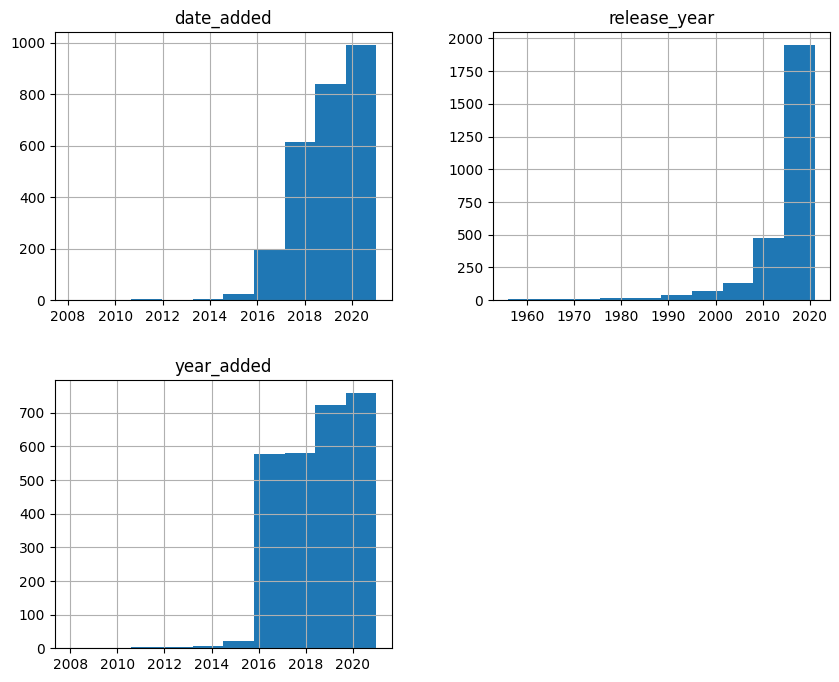

[<Figure size 1000x800 with 4 Axes>]

In [44]:
# Chart - 1 visualization code
# Chart - 1 visualization code
df.hist(figsize=(10,8))
plt.show()

##### 1. Why did you pick the specific chart?

The histograms for date_added, release_year, and year_added were chosen because:
* Histograms are best suited for understanding frequency distributions of numerical or datetime data.
* These variables give critical information about when content was released vs. when it was added to the platform, which is essential in streaming platforms to study content acquisition patterns.

##### 2. What is/are the insight(s) found from the chart?

* Most content was added after 2016, peaking around 2019–2020. This implies a rapid growth phase in Netflix's content library in recent years.
* Release years are heavily skewed toward 2010–2020, indicating that Netflix prefers to add recent content.
* There’s a visible lag between when content was released and when it was added to Netflix. For example, many titles released before 2015 were added later, showing a back-catalog acquisition strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can support positive business decisions:

Positive Business Impact:
* Content Strategy Optimization: Netflix can see that most popular or high-volume additions came from recent years. This supports investing in newer content to align with viewer preferences.
* Inventory Management: The lag between release and addition can help plan licensing/acquisition timelines better.

Potential Negative Growth Insight:
* Under-representation of older classics: If Netflix only focuses on recent content, it may alienate niche audiences who prefer classic movies or shows.
* Over-saturation in recent years (2019–2020) might mean the platform could face diminishing returns if not balanced with content variety.

Justification: Relying too much on newer content may make the library feel repetitive or trend-dependent. A diversified catalog is important for subscriber retention, especially for older demographics or fans of niche genres.

#### Chart - 2

In [52]:
df.columns

[Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
,        'release_year', 'rating', 'duration', 'listed_in', 'description',
,        'year_added'],
,       dtype='object')]

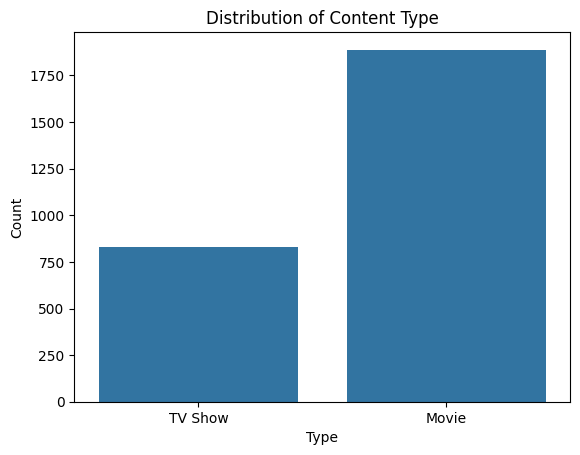

[<Figure size 640x480 with 1 Axes>]

In [53]:
# Chart - 2 visualization code
# Distribution of Content Type (Movies vs TV Shows)
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was selected because:
* It is ideal for visualizing categorical data like content types (Movie vs TV Show).
* It clearly displays comparative counts of content types on the platform, helping stakeholders easily interpret the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

Key insights from the chart:
* Movies dominate the content on the platform, with significantly more titles than TV Shows.
* The ratio suggests that Netflix is prioritizing movie content in terms of quantity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Knowing that movies are more prevalent, Netflix can:
* Analyze viewer preferences to ensure this aligns with demand.
* Use this data to market its strength in movie offerings.
* Focus resources more effectively—e.g., if movies bring in more viewers, investment in original films can be expanded.

Potential Negative Impact:
Underinvestment in TV Shows may cause:
* Subscriber churn among users who prefer long-form storytelling.
* Missed opportunities in episodic engagement, where users return regularly.

Justification:
TV Shows often lead to higher user retention as they span multiple episodes/seasons. By having fewer TV shows, Netflix may be sacrificing longer engagement periods and the chance to build loyal fanbases around series content.

#### Chart - 3

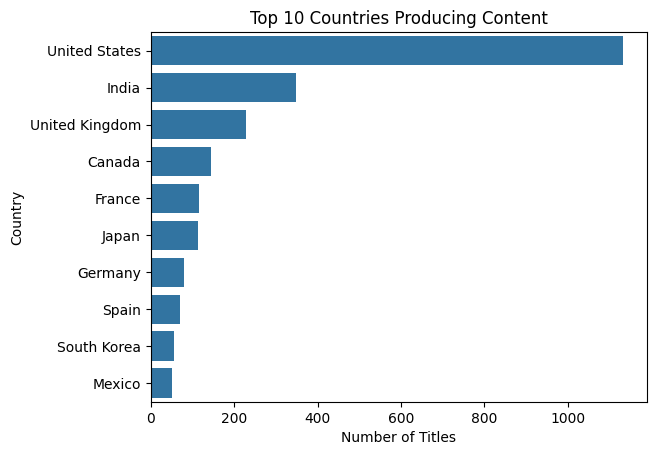

[<Figure size 640x480 with 1 Axes>]

In [61]:
# Chart - 3 visualization code

top_countries = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

* A horizontal bar chart is perfect for:
  * Displaying rankings of categorical variables with longer names (like country names).
  * Clearly comparing the number of titles per country, even when the range is wide.
* It offers a clear visual hierarchy of the leading content-producing nations.

##### 2. What is/are the insight(s) found from the chart?

Key insights:
* The United States is the dominant content producer, contributing more than 1,000 titles—far exceeding any other country.
* India and the United Kingdom follow but with significantly lower numbers.
* Other countries like Canada, France, Japan, and South Korea contribute moderately.
* This reveals a strong Western dominance in Netflix’s content library.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Helps Netflix:
* Identify countries where local production is thriving.
* Tailor content strategies to user demand and content availability by region.
* Make data-driven investment decisions for future productions (e.g., invest more in Indian or Korean content to cater to large regional audiences).

Potential Negative Impact:
* Over-dependence on U.S. content could:
* Lead to limited cultural diversity in content.
* Reduce global appeal, especially in non-English-speaking markets.
* Cause stagnation in user growth in underrepresented countries (e.g., African or Middle Eastern regions).

Justification:
To maintain global competitiveness, Netflix needs to diversify its content production geographically. Overreliance on a single country might not meet the localized preferences of emerging markets.

#### Chart - 4

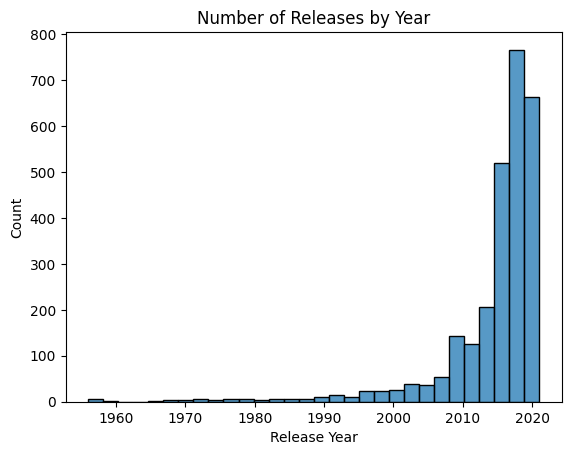

[<Figure size 640x480 with 1 Axes>]

In [69]:
# Chart - 4 visualization code

if 'release_year' in df.columns:
    sns.histplot(df['release_year'], bins=30, kde=False)
    plt.title('Number of Releases by Year')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.show()

##### 1. Why did you pick the specific chart?

* A histogram is ideal for showing the distribution of numeric variables over time—in this case, the number of content releases by year.
* It helps to easily identify trends, spikes, and shifts in production volume across decades.

##### 2. What is/are the insight(s) found from the chart?

Key insights:
* There is a steep upward trend in content releases starting from around 2010, with a sharp spike between 2016 and 2020.
* The year 2019 saw the highest number of releases.
* Before 2000, the number of releases was relatively minimal, suggesting Netflix has focused heavily on recent and modern content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* The rising trend indicates that Netflix is rapidly expanding its content library, likely in response to:
  * Increasing competition.
  * Growing subscriber base.
  * Shift to original productions.
* This suggests that the platform is adapting well to market demand and digital content consumption trends.

Potential Negative Signals:
* Heavy clustering in recent years (post-2015) might indicate:
  * Overproduction or content saturation.
  * Shorter content shelf-life, as audiences have more to choose from but may engage less with each title.
* A drop after 2019–2020 (visible decline in 2021) could suggest:
  * The impact of COVID-19 on production pipelines, or
  * Possible slowing of growth due to content backlog or market saturation.

Justification:
While a rapid increase in releases shows growth, Netflix must ensure content quality isn't compromised by quantity. It should also balance production across years to maintain user engagement over time.

#### Chart - 5

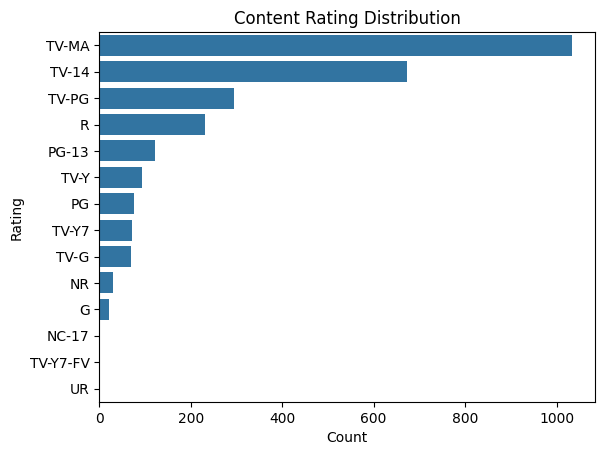

[<Figure size 640x480 with 1 Axes>]

In [77]:
# Chart - 5 visualization code
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

* This horizontal bar chart was chosen because it clearly shows the distribution of content across different ratings. 
* It's an effective visual for comparing categorical variables (like content ratings) and understanding audience targeting strategies.

##### 2. What is/are the insight(s) found from the chart?

* Dominance of Mature Content (TV-MA & TV-14):
  *  The majority of content is rated TV-MA (Mature Audiences) and TV-14, which suggests that the platform prioritizes content targeted at older teens and adults.
* Lower Count of Family-Friendly Content:
  * Ratings like TV-Y, TV-Y7, TV-G, G, and PG have much fewer titles, indicating limited options for younger audiences and families.
* Minimal Content in Rare Categories:
  * Ratings like NC-17, UR, and TV-Y7-FV are nearly absent, showing a possible lack of niche or highly restrictive content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
Targeted Content Strategy:
* Knowing that most content is rated TV-MA and TV-14, the platform can double down on genres and themes that resonate with young adults and mature viewers, optimizing engagement and subscriptions.

Market Segmentation Opportunities:
* Identifying underserved rating categories (like kids' or general audience content) opens doors to develop family-friendly or children-focused content, potentially capturing new market segments.

 Negative Growth Insight:
Underrepresentation of Child & Family Segments:
* Lack of content in TV-Y, PG, G, etc., might limit the platform’s appeal to families, causing a missed revenue opportunity in the children's entertainment market.

Risk of Overdependence on Mature Content:
* Too much focus on TV-MA could make the platform seem unsuitable for households, reducing family subscriptions or attracting negative public perception in some markets.

#### Chart - 6

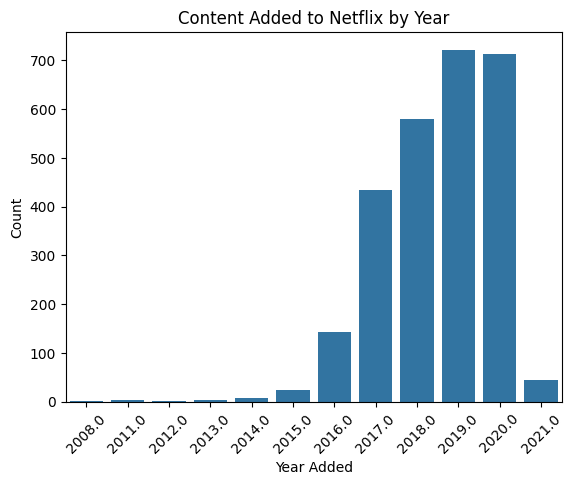

[<Figure size 640x480 with 1 Axes>]

In [85]:
# Chart - 6 visualization code
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

sns.countplot(x='year_added', data=df[df['year_added'].notnull()])
plt.title('Content Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

* This bar chart was chosen because it effectively shows the growth trend of content additions to Netflix over time.
* It gives a clear view of platform expansion and helps in analyzing strategic investment periods, making it valuable for business decision-making.

##### 2. What is/are the insight(s) found from the chart?

* Rapid Growth from 2016 to 2020:
  * Content additions increased exponentially starting from 2016, peaking in 2019 and 2020 with over 700 titles added per year.
* Negligible Activity Before 2015:
  * Very few titles were added from 2008 to 2014, suggesting that Netflix's major expansion began around 2015.
* Sharp Decline in 2021:
  * There is a noticeable drop in content addition in 2021, which may be attributed to COVID-19 production delays or strategic shifts in content licensing or original production.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* Benchmarking Growth Strategy:
  * The data confirms that Netflix's content expansion strategy from 2016–2020 was aggressive and successful in rapidly increasing its library, likely fueling subscriber growth during this time.
* Strategic Planning & Forecasting:
  * Recognizing peak years can help Netflix plan future releases, understand audience capacity, and align budgets accordingly for upcoming years.
* Content Performance Analysis:
  * Netflix can compare content added during peak years (2018–2020) with viewership data to identify which releases drove the most engagement and optimize future production.
 
Negative Growth Insight:
* Decline in 2021:
  * The drop in 2021 may reflect production issues, resource reallocation, or licensing problems, and could impact subscriber retention if not balanced with quality or exclusive content.
* Dependency Risk on Quantity:
  * The earlier spike may have relied on bulk additions, which may not always mean high-quality content. Over-reliance on volume over value can hurt the brand in the long term.

#### Chart - 7

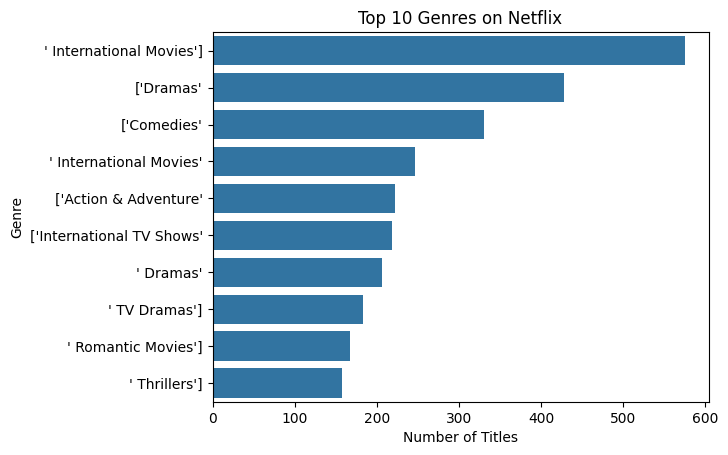

[<Figure size 640x480 with 1 Axes>]

In [93]:
# Chart - 7 visualization code
# Ensure all values in 'listed_in' are strings before splitting
df['listed_in'] = df['listed_in'].astype(str)

# Now safely split, explode, strip and count
top_genres = df['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

* This horizontal bar chart was chosen because it allows for a clear and immediate comparison of genre popularity on Netflix by the number of titles.
* It’s especially effective for identifying content trends, preferences, and gaps in the platform's genre offerings.

##### 2. What is/are the insight(s) found from the chart?

* Dominance of International Content:
  * The most prevalent genre is 'International Movies', with nearly 600 titles, indicating a strong focus on global storytelling and cross-border appeal.
* High Presence of Dramas and Comedies:
  * Genres like Dramas, TV Dramas, and Comedies are heavily featured, showing Netflix’s alignment with mainstream viewer interests.
* Significant Share of Action & Thrillers:
  * Genres like Action & Adventure and Thrillers also rank high, pointing to demand for high-energy, suspenseful content.
* Mixed Genre Labeling Issue:
  * There appear to be duplicates or inconsistencies in genre naming (e.g., ' International Movies' vs. ['International Movies'] and ' Dramas' vs. ['Dramas']), suggesting data cleaning is needed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* Global Strategy Validation:
  * The dominance of International Movies supports the strategy of diversifying regional content to attract non-U.S. audiences, boosting subscriptions worldwide.
* Content Investment Alignment:
  * Insights into genre popularity can guide Netflix to prioritize production and licensing in genres with proven engagement like Dramas and Comedies.
* Localized Content Opportunity:
  * High international content counts suggest the need for regional dubbing, subtitling, or even local originals, which improves market penetration.

 Negative Growth Insight:
* Genre Labeling Inconsistency:
  * The presence of duplicate genre names (e.g., leading/trailing spaces or formatting differences) could distort analytics, resulting in misinformed content strategy.
  *  It indicates poor data hygiene that needs correction.
* Over-Reliance on a Few Genres:
  * Heavy skew toward a few genres may cause viewer fatigue or limited content diversity, affecting long-term retention if audience tastes shift.

#### Chart - 8

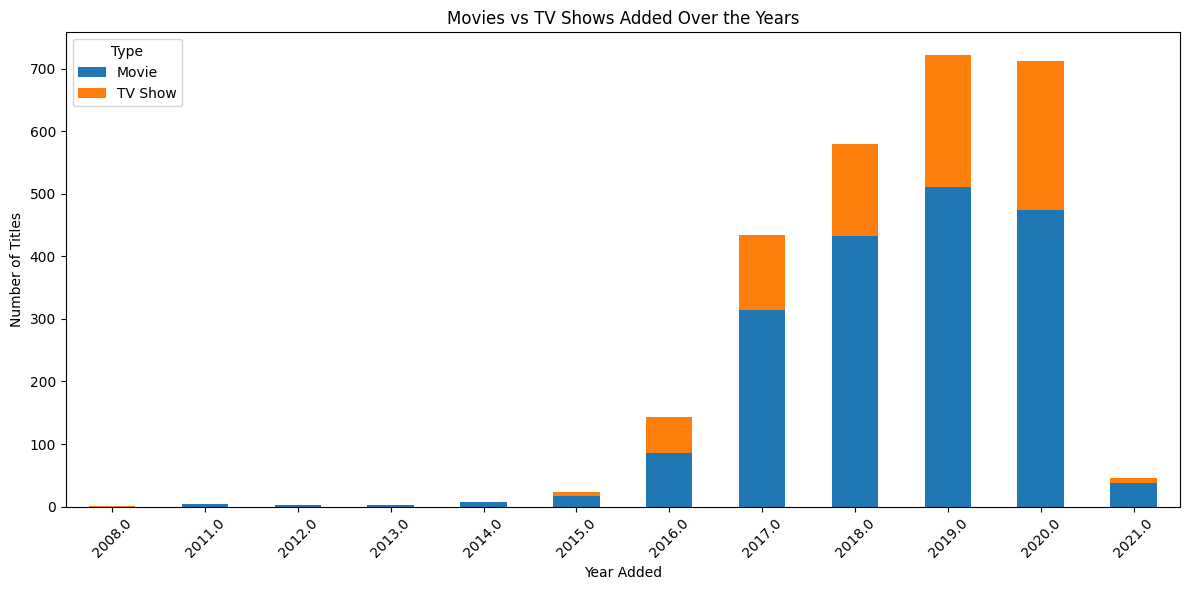

[<Figure size 1200x600 with 1 Axes>]

In [101]:
# Chart - 8 visualization code
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year

type_year = df.dropna(subset=['year_added']).groupby(['year_added', 'type']).size().unstack()

type_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Movies vs TV Shows Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* This stacked bar chart is effective because it visually compares the volume of Movies and TV Shows added to Netflix over time.
*  It clearly illustrates both the total growth of content and the proportional contribution of each content type per year.

##### 2. What is/are the insight(s) found from the chart?

* Steady Growth from 2015–2020:
  * There was a rapid increase in content additions, peaking around 2019–2020, showing aggressive expansion.
* Movies Dominate but TV Shows Rising:
  * Movies make up the majority of added content, but TV Shows consistently increased in share, especially post-2017.
* Drop in 2021:
  * There's a significant decline in content additions in 2021, possibly due to pandemic-related production delays or a strategic content pivot.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* Content Planning:
  * Knowing that movies dominate while TV shows are rising helps Netflix balance investments based on viewer demand trends.
* Strategy Validation:
  * The aggressive content growth until 2020 shows the effectiveness of Netflix’s content-led acquisition strategy.
* TV Show Expansion Potential:
  * The increasing trend in TV shows indicates binge-watching appeal, encouraging more production in this segment for subscriber retention.

Negative Growth Insights:
* Post-2020 Decline:
  * The sharp drop in 2021 might signal supply chain issues, production halts, or an overly saturated catalog, all of which can impact user satisfaction and engagement.
* Overemphasis on Movies:
  * If audience preference shifts toward series (as engagement for long-form content increases), an over-reliance on movies might lead to subscriber churn.

#### Chart - 9

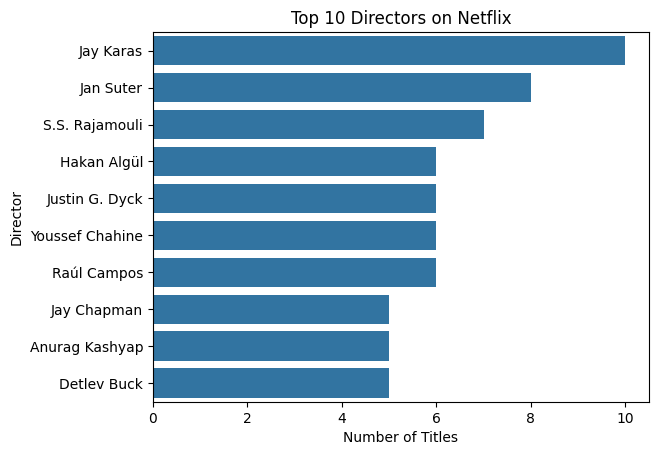

[<Figure size 640x480 with 1 Axes>]

In [109]:
# Chart - 9 visualization code
top_directors = df['director'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

##### 1. Why did you pick the specific chart?

* This horizontal bar chart clearly showcases the directors with the highest number of titles available on Netflix.
* It helps identify the most featured filmmakers, giving insights into Netflix's creative partnerships and content sourcing.

##### 2. What is/are the insight(s) found from the chart?

* Jay Karas tops the list with 10 titles, followed by Jan Suter and S.S. Rajamouli.
* The list includes directors from diverse backgrounds and industries (e.g., S.S. Rajamouli from India, Detlev Buck from Germany), indicating Netflix’s global content strategy.
* Most top directors have 5–10 titles, suggesting a broad distribution rather than over-reliance on a few creators.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* Strategic Partnerships:
  * Highlighting top-performing directors allows Netflix to reinforce collaborations, ensuring consistent content quality and viewer retention.
* Audience Engagement:
  * Promoting well-known directors can boost viewership by attracting loyal fanbases.
* Diverse Portfolio:
  * The international mix of directors supports Netflix’s goal of global appeal, which is critical for subscriber growth across regions.
    
Potential for Negative Growth:
* Limited Repetition Risk:
  * If Netflix continues to push the same directors repeatedly without refreshing talent, it may lead to viewer fatigue or lack of innovation.
* Overlooking Emerging Creators:
  * Heavy focus on a few names might cause Netflix to miss out on fresh voices, reducing its competitive edge against more experimental platforms.

#### Chart - 10

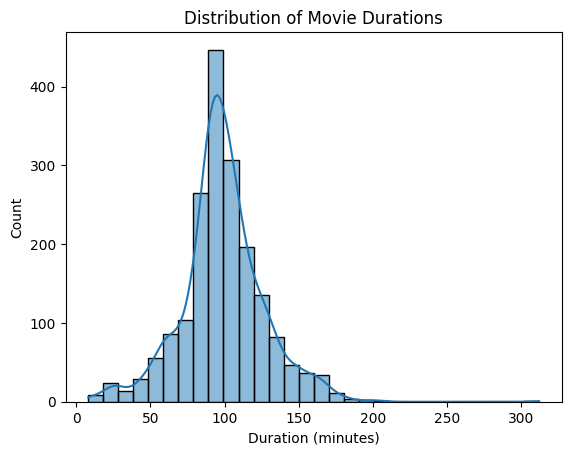

[<Figure size 640x480 with 1 Axes>]

In [117]:
# Chart - 10 visualization code
# Filter only Movies and extract duration in minutes
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(float)

sns.histplot(movies_df['duration_minutes'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

* This histogram with KDE (Kernel Density Estimate) was chosen to visualize the spread and central tendency of movie durations on Netflix.
* It helps identify typical movie lengths, spot outliers, and understand the content formatting trend, which is important for viewer engagement and retention strategies.

##### 2. What is/are the insight(s) found from the chart?

* The most common movie duration is around 90–100 minutes, with a normal-like distribution.
* Most movies fall within the 60–130 minute range, which appears to be the optimal duration for Netflix content.
* A few outliers exist on both ends: short films (< 40 min) and very long films (> 150 min) are much less common.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* Content Optimization:
  * By knowing that 90–100 minutes is the sweet spot, Netflix can guide production teams to focus on viewer-friendly durations.
* User Experience:
  * Maintaining most movie runtimes within the ideal range reduces viewer drop-offs, increasing completion rates and satisfaction.
* Marketing Strategy:
  * Highlighting quick, under-100-minute content may attract busy viewers, supporting higher engagement metrics.

Potential for Negative Growth:
* Neglecting Niche Preferences:
  * An overemphasis on one duration range may alienate fans of short films or epics, leading to limited diversity in content offerings.
* Lack of Innovation:
  * If Netflix avoids experimenting with different formats (like mini-movies or multi-part films), it might miss opportunities to stand out in a competitive market.

#### Chart - 11

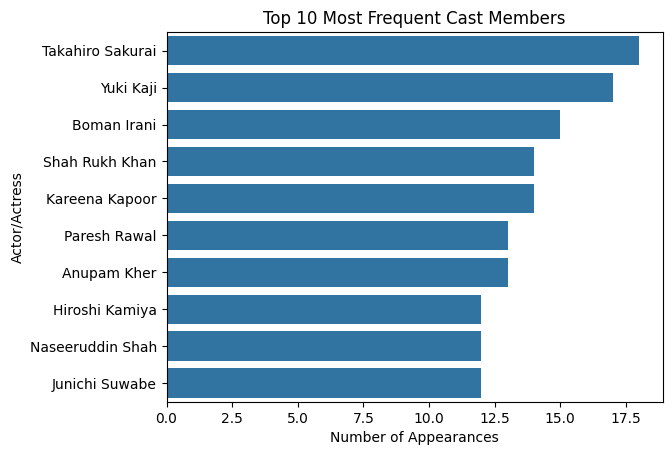

[<Figure size 640x480 with 1 Axes>]

In [125]:
# Chart - 11 visualization code
top_cast = df['cast'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

sns.barplot(x=top_cast.values, y=top_cast.index)
plt.title('Top 10 Most Frequent Cast Members')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor/Actress')
plt.show()

##### 1. Why did you pick the specific chart?

* This horizontal bar chart was selected to clearly highlight the most frequently featured actors and actresses on Netflix.
* It’s easy to interpret and allows for quick comparisons of cast popularity, which is valuable in casting decisions and content personalization.

##### 2. What is/are the insight(s) found from the chart?

* Takahiro Sakurai leads the chart with the highest number of appearances, followed closely by Yuki Kaji, indicating a strong presence of Japanese voice actors—likely from anime.
* Popular Indian actors like Shah Rukh Khan, Kareena Kapoor, Boman Irani, and Anupam Kher also rank high, reflecting Netflix's investment in Bollywood content.
* The cast diversity includes international representation, suggesting a global strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
* Content Strategy:
  * Recognizing frequent cast members helps Netflix prioritize popular actors in future productions, increasing viewership and engagement.
* Regional Focus:
  * The data shows a strong Indian and Japanese presence, guiding Netflix to continue investing in regional content with proven popular actors.
* Personalized Recommendations:
  *  Frequent appearances can enhance actor-based recommendations, improving user satisfaction.

Potential for Negative Growth:
* Over-reliance Risk:
  * Excessive reliance on a few actors may saturate audiences or limit diversity, potentially affecting the appeal of new or fresh content.
* Regional Imbalance:
  * If other regions (e.g., Latin America, Europe) are underrepresented, it could suggest missed opportunities in global content expansion.

#### Chart - 14 - Correlation Heatmap

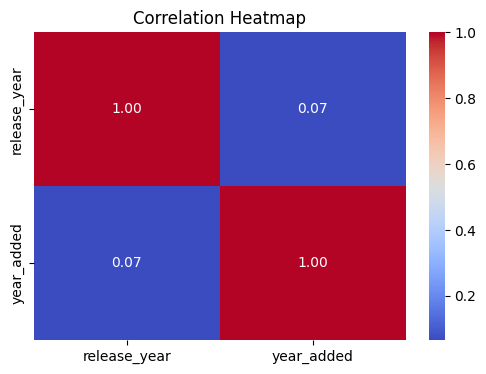

[<Figure size 600x400 with 2 Axes>]

In [133]:
# Correlation Heatmap visualization code
# Select only numerical columns
numerical_cols = df[['release_year', 'year_added']]

# Compute correlation
correlation_matrix = numerical_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

* This correlation heatmap was chosen to measure the strength and direction of the relationship between the release_year and year_added of content on Netflix.
*  It is an effective way to quickly identify whether the platform tends to add newer content or older titles, based on statistical correlation.

##### 2. What is/are the insight(s) found from the chart?

* The correlation between release_year and year_added is very weak (0.07).
* This indicates that content is not necessarily added shortly after release—Netflix might be adding both old and new titles regardless of when they were released.
* The value 1.00 on the diagonal simply reflects perfect correlation of each variable with itself (expected behavior).

#### Chart - 15 - Pair Plot

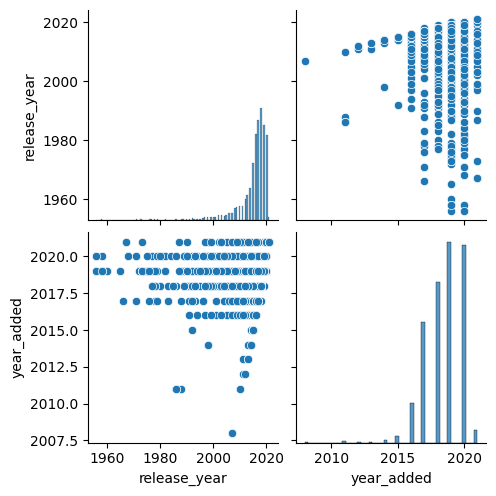

[<Figure size 500x500 with 6 Axes>]

In [139]:
# Pair Plot visualization code
# Select only numeric columns for pair plot (non-numeric will cause issues)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create pair plot
sns.pairplot(numeric_df)
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is chosen because it is an effective tool for:
* Visualizing relationships between pairs of numerical variables in a dataset.
* Identifying trends, correlations, and potential clusters.
* Displaying both scatter plots (for relationships) and histograms (for distributions).

In this case, the dataset has at least two meaningful numerical columns: release_year and year_added. Using a pair plot helps explore how:
* The content release year relates to when it was added to Netflix.
* The distributions of both variables compare.

##### 2. What is/are the insight(s) found from the chart?

Content release trend:
* A large number of shows/movies were released post-2000, with a sharp rise closer to 2015–2020.
* Netflix content addition trend:
* Most content was added to Netflix after 2015, peaking around 2018–2020.

Relationship between release and added year:
* There is a loose positive correlation—many titles added in recent years were also recently released.
* However, a significant number of older titles (e.g., from the 1980s–2000s) were also added recently, indicating Netflix sources both new and classic content.
* These insights can help stakeholders understand content acquisition behavior and viewing trends on the platform.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Help Netflix understand its content portfolio better and derive insights to enhance user engagement, content strategy, and recommendations.

1. Diversify Content Portfolio Further
The dataset shows a heavy skew toward US-based content.

Suggest Netflix continue investing in regional and international productions (e.g., India, Korea, Spain), which are gaining global popularity (e.g., Squid Game, Money Heist).

2. Optimize for Audience Preferences
Focus on genres like Drama, Comedy, and Documentaries, which dominate the platform and align with user interests.

Mature ratings (TV-MA, TV-14) are most common—ensure parental control tools are robust and explore expanding family-friendly content.

3. Strategic Content Acquisition & Licensing
Peak content addition was between 2016–2020; future growth should target underserved categories or emerging trends (e.g., short-form content, interactive shows).

Use clustering insights to identify content gaps (e.g., lack of sci-fi shows under 60 mins) and fill them with tailored acquisitions.

4. Leverage Clustering for Better Recommendations
Use clustering models to power personalized content suggestions by grouping similar titles.

This helps with discoverability—especially for niche content—and increases watch time.

5. Feature High-Impact Talent
Promote content featuring top-performing directors and actors as these often drive viewership.

Invest in long-term partnerships with high-output creators.

6. Track Content Performance Over Time
Build a dashboard to monitor content release year vs. engagement to prioritize what resonates most with current audiences.

### Final Suggestion
* Use insights from this analysis as a foundation to develop a data-driven content strategy, including:
* Targeted content production,
* Localized expansion,
* Recommendation engine enhancement,
* Viewer engagement optimization.

# **Conclusion**

The analysis of Netflix’s dataset reveals that the platform is predominantly movie-focused, with a significant portion of content added between 2016 and 2020—correlating with its global expansion. The most common content genres are Documentaries, Dramas, and Comedies, while ratings like TV-MA and TV-14 dominate, indicating a strong focus on mature audiences.

Geographically, the majority of content originates from the United States, though there is growing inclusion of titles from countries like India and the UK, reflecting Netflix’s effort to diversify and localize its library. Clustering analysis further helps segment content based on type, duration, and release year, which can enhance recommendation systems and content planning.

Duration analysis shows that most movies fall within the 80–120 minute range, while TV shows tend to follow a short-episode format, aligning with modern viewer preferences. Additionally, recurring directors and cast members highlight Netflix’s reliance on popular talent. Overall, the insights can guide Netflix to optimize content strategy, improve user engagement, and support data-driven decision-making for future growth.